In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import plotly.express as px

In [5]:
import plotly.io as pio

In [6]:
from plotly.offline import init_notebook_mode

In [7]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [8]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [10]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [11]:
data = data.dropna()

 FROM THE DATA WE CAN MAINLY EXPLORE THE FOLLOWING AREAS:

1.EV Adoption Over Time: Analyze the growth of the EV population by model year.                            
2.EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).       
3.Make and Model Popularity: Identify the most popular makes and models among the registered EVs.                        
4.Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.                    
5.Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.


# Analysis according to EV adoptation over time 

In [12]:
data1 = data['Model Year'].value_counts().reset_index()
fig1 = px.bar(data1, x = 'index' , y = 'Model Year',
             template = 'plotly_dark', color = 'Model Year', 
             opacity = 0.7, title = 'EV Adoption Over Time')
fig1.update_layout(
           xaxis_title = 'Model Year',
           yaxis_title = 'Number of Vehicles Registered')
pio.renderers.default = 'iframe'
fig1.show()

The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

In [13]:
ev_county_distribution = data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
top_counties_data = data[data['County'].isin(top_counties)]
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_cities = ev_city_distribution_top_counties.head(10)
fig = px.bar(top_cities, x = 'City', y = 'Number of Vehicles', color = 'County',
            template = 'plotly_dark',title = 'Top Cities in Top Counties by EV Registrations')
pio.renderers.default = 'iframe'
fig.show()


The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:

1.Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.                                                      
2.Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.                                                    
3.Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.                                
4.Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.                                                     
5.The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.                     
6.Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.  

# Analysis according to the  distribution of electric vehicle Types

In [14]:
datatype = data['Electric Vehicle Type'].value_counts().reset_index()
fig = px.pie(datatype, names = 'index', values = 'Electric Vehicle Type',
            template = 'plotly_dark', title = 'Distribution of Electric Vehicle Types')
pio.renderers.default = 'iframe'
fig.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.



# Popularity of EV manufacturers

In [15]:
datamake = data['Make'].value_counts().head(10).reset_index()
fig = px.bar(datamake, x = 'Make', y = 'index',color = 'Make', template = 'plotly_dark',
            opacity = 0.8, title = 'Top 10 Popular EV Makes',orientation='h')
fig.update_layout(
           xaxis_title = 'Number of Vehicles Registered',
           yaxis_title = 'Make')

pio.renderers.default = 'iframe'
fig.show()

The above chart shows that:

1.TESLA leads by a substantial margin with the highest number of vehicles registered.
2.NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.                                            
3.FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.


In [16]:
datamake2 = data['Make'].value_counts().head(10)
top_3_makes = datamake2.head(3).index
top_makes_data = data[data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models = ev_model_distribution_top_makes.head(10)
fig = px.bar(top_models, x = 'Model', y = 'Number of Vehicles',
            color = 'Make', template = 'plotly_dark',opacity = 0.8,
            title = 'Top Models in Top 3 Makes by EV Registrations')
pio.renderers.default = 'iframe'
fig.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:

1.TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.                   
2.NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.                                 
3.TESLA’s MODEL S and MODEL X also have a significant number of registrations.                                                
4.CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.                  
5.NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.                          

# Analysis according to the distribution of electric range 

In [17]:
fig = px.histogram(data, x = 'Electric Range', nbins=30,
                  template = 'plotly_dark',opacity = 0.8,
                  title = 'Distribution of Electric Vehicle Ranges')
fig.update_layout(
           xaxis_title = 'Electric Range (miles)',
           yaxis_title = 'Number of Vehicles')
fig.add_vline(x=data['Electric Range'].mean(), line_width=3, line_dash="dash", line_color="red")
pio.renderers.default = 'iframe'
fig.show()

The above graph shows the mean electric range. Key observations from the graph include:

1.There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.                    
2.The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.                                    
3.The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.                                 
4.Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.                                                    

In [18]:
average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()
fig = px.line(average_range_by_year,x='Model Year', y='Electric Range',
             template = 'plotly_dark',title = 'Average Electric Range by Model Year',markers=True)
fig.update_layout(
           xaxis_title = 'Model Year',
           yaxis_title = 'Average Electric Range (miles)')

pio.renderers.default = 'iframe'
fig.show()


The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

1.There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.                                          
2.There is a noticeable peak around the year 2020 when the average range reaches its highest point.                             
3.Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.   
4.After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [19]:
ev_registration_counts = data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

1.In 2021, there were 19,063 EVs registered.                   
2.In 2022, the number increased to 27708 EVs.                       
3.In 2023, a significant jump to 57,519 EVs was observed.             
4.For 2024, currently, 7,072 EVs are registered, which suggests partial data.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [20]:
from scipy.optimize import curve_fit

In [21]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]


In [22]:
# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)


In [23]:
# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values


In [24]:
# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)


In [25]:
# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)


In [26]:
# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
forecasted_evs

{2024: 79079.20682850912,
 2025: 119653.95975054416,
 2026: 181047.2140297609,
 2027: 273940.735235793,
 2028: 414496.9963978071,
 2029: 627171.2743813773}

Now, let’s plot the estimated market size data:




In [27]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)


In [28]:
# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")



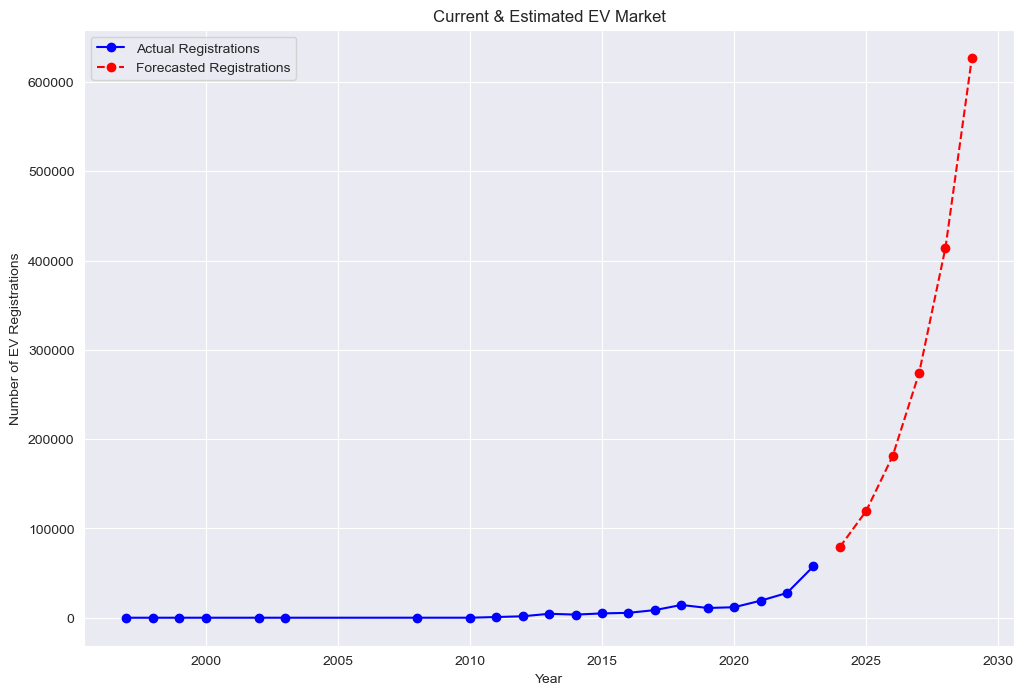

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

From the above graph, we can see:

1.The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.       
2.The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.


Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.

